# Stable Diffusion Inference

## Setup

In [2]:
!pip install diffusers==0.3.0
!pip install transformers scipy ftfy
!pip install "ipywidgets>=7,<8"

from PIL import Image
from diffusers import StableDiffusionPipeline
import random
import uuid
import torch

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

"""
# download weights
%cd /content/
for i in range(87):
  i = i + 1
  url = f"https://github.com/rmyj/txt2img/assets/-/raw/main/stable-diffusion-v1-4.zip.{i:03}"
  !wget $url # shows error but works 

# concatenate all part files to one zip
!cat /content/stable-diffusion-v1-4.zip* > /content/tmp.zip
!rm /content/stable-diffusion-v1-4.zip*

# repair combination
!zip -FF /content/tmp.zip --out /content/tmp-full.zip
!rm /content/tmp.zip

# unzip combination
!apt-get install -y unzip
!unzip /content/tmp-full.zip
!rm /content/tmp-full.zip
"""

# set variables for inference
model_id = "/content/tmp-full/"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")

# to disable the safety checker
pipe.safety_checker = lambda images, clip_input: (images, False)

## Image Synthesis

library of the universe-11048303075732958257


  0%|          | 0/75 [00:00<?, ?it/s]

saved to /home/jovyan/work/output/


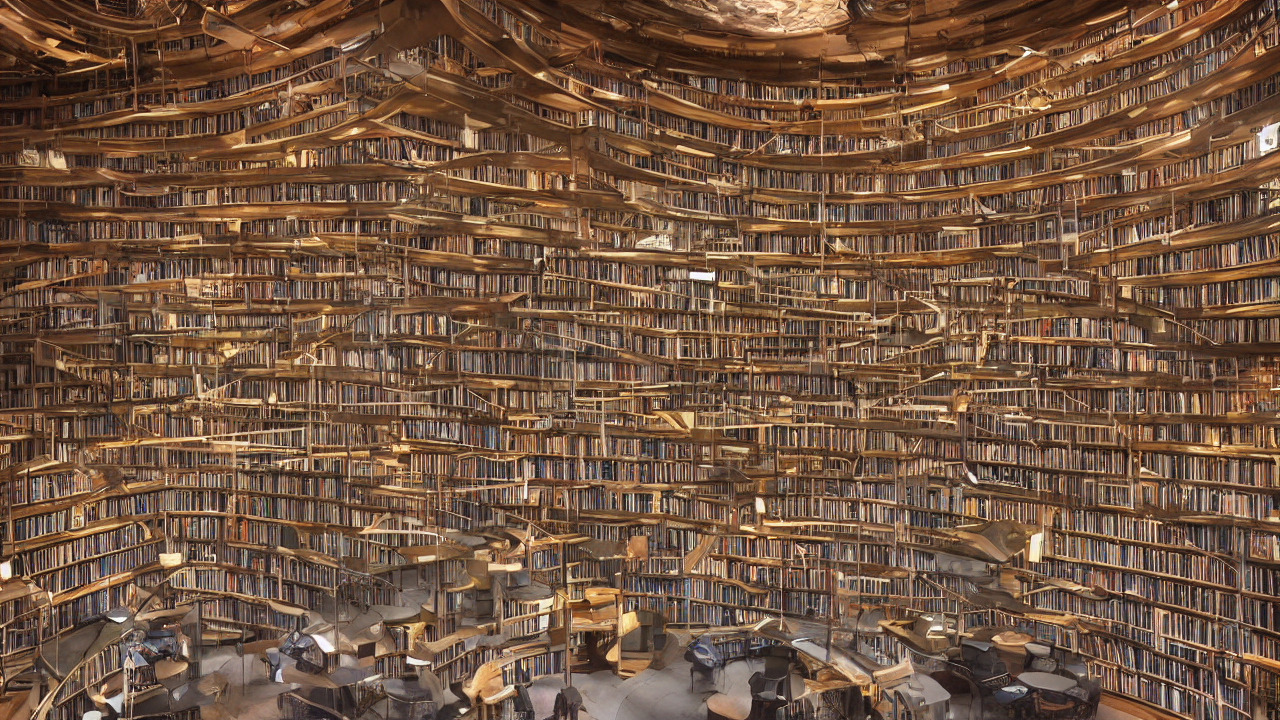

In [8]:
prompt = "an elephant in space"

height = 512
width = 512

# can set seed here
seed = uuid.uuid4().int & (1<<64)-1
g_cuda = torch.Generator("cuda").manual_seed(seed)
        
print(f"{prompt}-{seed}")
image = pipe(prompt, height=height, width=width, num_inference_steps=74, guidance_scale=7.5, generator=g_cuda).images[0]
    
#image.save(f"/home/jovyan/work/output/{prompt}-{seed}.png")
#print(f"saved to /home/jovyan/work/output/")
image